In [1]:
# Imports
import pandas as pd
import plotly.express as px
from prettytable import PrettyTable
import plotly.graph_objects as go
import numpy as np
import random
import csv
import os
import json
import altair as alt
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [2]:
WD = os.path.join("E:\\", "BUSTEDS-MH")
DATA = os.path.join(WD, "tables", "Table_13Datasets_BUSTEDS_and_BUSTEDS-MH.csv")

In [3]:
pct = lambda a, b: (a / b) * 100
pct_formatted = lambda a, b: str(round((a / b) * 100, 2)) + "%"

In [4]:
print("Reading:", DATA)
df = pd.read_csv(DATA)
df = df.reset_index(drop=True)
df.index += 1
df

Reading: E:\BUSTEDS-MH\tables\Table_13Datasets_BUSTEDS_and_BUSTEDS-MH.csv


,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
1,COXI,BUSTEDS,21,510,5.000000e-01,24288.711706,0.000000,0.530839,0.012662,0.459727,...,NaN,NaN,NaN,1.175475e+00,22.386048,1.376992e-05,0.0,NaN,NaN,NaN
2,COXI,BUSTEDS-MH,21,510,5.000000e-01,24311.097754,0.000000,0.941922,0.273945,0.058078,...,NaN,92.378533,0.000000,1.003126e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,ENCenv,BUSTEDS,23,500,5.000000e-01,13699.078482,0.050236,1.000000,0.115207,0.000000,...,NaN,NaN,NaN,1.384767e+00,6.063006,4.824308e-02,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,5.000000e-01,13705.141488,0.038535,0.464794,0.059943,0.535206,...,NaN,87.196830,NaN,1.052878e+00,NaN,NaN,NaN,NaN,NaN,NaN
5,HIV_RT,BUSTEDS,476,335,7.174705e-11,52048.518414,0.000000,0.010372,0.152399,0.988619,...,NaN,NaN,NaN,2.397486e+03,NaN,NaN,22.0,36|39|48|64|65|69|72|75|103|104|122|138|151|16...,151|162|228|75|69|215|245|64|48|122|188|181,12.0
6,HIV_RT,BUSTEDS-MH,476,335,1.319250e-03,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1.880919e+03,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
7,HIVvif,BUSTEDS,29,192,2.270883e-02,6911.649070,0.000000,0.049597,0.759086,0.949923,...,NaN,NaN,NaN,3.248050e+06,1.442446,4.861572e-01,1.0,6,NaN,NaN
8,HIVvif,BUSTEDS-MH,29,192,5.000000e-01,6913.091516,0.598170,0.000004,0.610292,0.714410,...,NaN,0.055487,59449.992580,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
9,HepatitisD,BUSTEDS,33,196,1.118888e-08,10424.225296,0.000000,0.513135,0.668916,0.467758,...,NaN,NaN,NaN,2.751555e+02,NaN,NaN,23.0,6|9|13|17|24|28|31|35|38|75|85|90|117|122|140|...,NaN,0.0
10,HepatitisD,BUSTEDS-MH,33,196,5.000000e-01,10423.732376,0.000000,0.150724,0.074813,0.546368,...,NaN,7.485536,1585.361270,1.541786e+00,0.492920,7.815627e-01,NaN,NaN,NaN,NaN


In [5]:
# simple counts

num_genes = df[df["Method"] == "BUSTEDS-MH"]
delta_cAIC = df[df["ΔcAIC"] > 5]
BUSTEDS_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS"]
BUSTEDSMH_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS-MH"]

print("# Number of genes:", num_genes.shape[0])

print("# Number of genes preferring BUSTEDS (by more than 5 delta cAIC):", BUSTEDS_preferred.shape[0])
print("# Number of genes preferring BUSTEDS-MH (by more than 5 delta cAIC):", BUSTEDSMH_preferred.shape[0])

# Number of genes: 13
# Number of genes preferring BUSTEDS (by more than 5 delta cAIC): 5
# Number of genes preferring BUSTEDS-MH (by more than 5 delta cAIC): 6


In [6]:
num_genes

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
2,COXI,BUSTEDS-MH,21,510,0.500000,24311.097754,0.000000,0.941922,0.273945,0.058078,...,NaN,92.378533,0.000000,1.003126,NaN,NaN,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,0.500000,13705.141488,0.038535,0.464794,0.059943,0.535206,...,NaN,87.196830,NaN,1.052878,NaN,NaN,NaN,NaN,NaN,NaN
6,HIV_RT,BUSTEDS-MH,476,335,0.001319,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1880.919309,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
8,HIVvif,BUSTEDS-MH,29,192,0.500000,6913.091516,0.598170,0.000004,0.610292,0.714410,...,NaN,0.055487,59449.992580,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
10,HepatitisD,BUSTEDS-MH,33,196,0.500000,10423.732376,0.000000,0.150724,0.074813,0.546368,...,NaN,7.485536,1585.361270,1.541786,0.492920,7.815627e-01,NaN,NaN,NaN,NaN
12,InfluenzaA,BUSTEDS-MH,349,329,0.500000,23230.195507,0.371964,0.000000,0.439776,1.000000,...,NaN,63.418294,0.000000,1.004667,12.299878,2.133612e-03,NaN,NaN,NaN,NaN
14,adh,BUSTEDS-MH,23,254,0.019519,9359.113256,0.012977,0.117011,0.041614,0.858038,...,6|35|39|49|69|133|134|163|165|166|170|197|216|...,89.984693,104.479216,15.357549,NaN,NaN,NaN,NaN,NaN,NaN
16,bglobin,BUSTEDS-MH,17,144,0.002279,7384.819661,0.043438,0.824834,0.718563,0.156757,...,10|11|42|48|50|54|74|110|116|124|133,177.927779,49.072219,243.158128,30.770774,2.080708e-07,NaN,NaN,NaN,NaN
18,camelid,BUSTEDS-MH,212,96,0.004786,33667.966508,0.276349,0.470666,1.000000,0.496885,...,1|11|14|23|25|29|32|33|40|50|51|52|53|54|57|58...,30.922244,160.412815,58.009593,26.638034,1.642950e-06,NaN,NaN,NaN,NaN
20,flavNS5,BUSTEDS-MH,18,342,0.500000,18488.576810,0.015894,0.380981,0.016164,0.619019,...,NaN,101.731853,0.000000,1.405521,42.003388,7.569725e-10,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI',
       'BUSTEDS-MH_num_ER_Sites', 'BUSTEDS-MH_ER_Sites', 'pctchg_w3',
       'pctchg_p3', 'w3_impact', 'ΔcAIC', 'RelativeSupport',
       'BUSTEDS_num_ER_Sites', 'BUSTEDS_ER_Sites', 'ER_Sites_Intersection',
       'num_ER_Sites_Intersection'],
      dtype='object')

In [8]:
columns = ['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI']

dfv = df[columns]
dfv = dfv.fillna("")
dfv = dfv.round(2)
dfv

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,p3,SRV1,SRV_p1,SRV2,SRV_p2,SRV3,SRV_p3,DH_Rate,TH_Rate,TH_Rate_SI
1,COXI,BUSTEDS,21,510,0.50,24288.71,0.00,0.53,0.01,0.46,...,0.01,0.03,0.02,0.57,0.94,12.41,0.04,,,
2,COXI,BUSTEDS-MH,21,510,0.50,24311.10,0.00,0.94,0.27,0.06,...,0.00,0.00,0.01,0.58,0.47,1.39,0.52,0.0,0.0,7.002608
3,ENCenv,BUSTEDS,23,500,0.50,13699.08,0.05,1.00,0.12,0.00,...,0.00,0.39,0.29,1.13,0.68,4.55,0.03,,,
4,ENCenv,BUSTEDS-MH,23,500,0.50,13705.14,0.04,0.46,0.06,0.54,...,0.00,0.40,0.30,1.13,0.67,4.55,0.03,0.012054,0.0,0.0
5,HIV_RT,BUSTEDS,476,335,0.00,52048.52,0.00,0.01,0.15,0.99,...,0.00,0.40,0.51,1.21,0.41,4.12,0.07,,,
6,HIV_RT,BUSTEDS-MH,476,335,0.00,52037.17,0.00,0.01,0.15,0.99,...,0.00,0.40,0.51,1.19,0.42,3.96,0.08,0.040897,0.0,0.0
7,HIVvif,BUSTEDS,29,192,0.02,6911.65,0.00,0.05,0.76,0.95,...,0.00,0.29,0.54,1.16,0.33,3.57,0.13,,,
8,HIVvif,BUSTEDS-MH,29,192,0.50,6913.09,0.60,0.00,0.61,0.71,...,0.29,0.30,0.54,1.15,0.33,3.51,0.13,0.00139,0.162476,0.0
9,HepatitisD,BUSTEDS,33,196,0.00,10424.23,0.00,0.51,0.67,0.47,...,0.02,0.04,0.21,0.76,0.60,2.78,0.19,,,
10,HepatitisD,BUSTEDS-MH,33,196,0.50,10423.73,0.00,0.15,0.07,0.55,...,0.30,0.07,0.24,0.82,0.56,2.64,0.20,0.231317,0.0,0.0


In [9]:
import dataframe_image as dfi

In [10]:
dfi.export(dfv,"13Datasets_Table.png")#

## Numbers

In [11]:
# simple counts
num_genes_BUSTEDSMH = df[df["Method"] == "BUSTEDS-MH"]
num_genes_BUSTEDS = df[df["Method"] == "BUSTEDS"]

# goodness of fit, model fit
delta_cAIC = df[df["ΔcAIC"] > 0]
BUSTEDS_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS"]
BUSTEDSMH_preferred = delta_cAIC[delta_cAIC["Method"] == "BUSTEDS-MH"]

# cAIC
print("# Number of genes (BUSTEDS-MH):", num_genes_BUSTEDSMH.shape[0])
print("# Number of genes (BUSTEDS):", num_genes_BUSTEDS.shape[0])
print("# Number of genes preferring BUSTEDS-MH (by any amount, cAIC):", BUSTEDSMH_preferred.shape[0])
print("# Number of genes preferring BUSTEDS (by any amount, cAIC):", BUSTEDS_preferred.shape[0])


x = pct_formatted(BUSTEDSMH_preferred.shape[0], num_genes_BUSTEDSMH.shape[0])
print("# Model preference for BUSTEDS-MH:", x, "of datasets")

y = BUSTEDSMH_preferred["ΔcAIC"].median()
print("# Median ΔcAIC for datasets preferring BUSTEDS-MH:", y)

Q3 = np.quantile(BUSTEDSMH_preferred["ΔcAIC"], 0.75)
Q1 = np.quantile(BUSTEDSMH_preferred["ΔcAIC"], 0.25)
IQR = Q3 - Q1
print("# IQR (ΔcAIC) for datasets preferring BUSTEDS-MH:", IQR)


# LRT
## Datasets where BUSTEDS and BUSTEDS-MH find selection
BUSTEDSMH_selection_works = num_genes_BUSTEDSMH[num_genes_BUSTEDSMH["LRT p-value"] <= 0.05]
BUSTEDS_selection_works = num_genes_BUSTEDS[num_genes_BUSTEDS["LRT p-value"] <= 0.05]

y = set(BUSTEDSMH_selection_works["Gene"].to_list()).intersection(BUSTEDS_selection_works["Gene"].to_list())

print ("# Genes where BUSTEDS and BUSTEDS-MH both find evidence of episodic diversifying selection:", len(y), "or",
       str(round(pct(len(y), num_genes_BUSTEDSMH.shape[0]), 2)) + "%")

# Among the genes that prefer BUSTEDS-MH, what is the average DH, TH, TH_SI rate?


# w3 median for each method
df_BUSTEDSMH = df[df["Method"] == "BUSTEDS-MH"]  
df_BUSTEDS = df[df["Method"] == "BUSTEDS"]

# Number of genes (BUSTEDS-MH): 13
# Number of genes (BUSTEDS): 13
# Number of genes preferring BUSTEDS-MH (by any amount, cAIC): 7
# Number of genes preferring BUSTEDS (by any amount, cAIC): 6
# Model preference for BUSTEDS-MH: 53.85% of datasets
# Median ΔcAIC for datasets preferring BUSTEDS-MH: 26.63803370740061
# IQR (ΔcAIC) for datasets preferring BUSTEDS-MH: 17.794142674212253
# Genes where BUSTEDS and BUSTEDS-MH both find evidence of episodic diversifying selection: 5 or 38.46%


In [12]:
df_BUSTEDSMH["w3"].median()

1.24168665622631

In [13]:
df_BUSTEDS["w3"].median()

7.03744147938701

In [14]:
df_BUSTEDSMH["w3"].describe()

count    13.000000
mean      6.606936
std      11.800329
min       1.000000
25%       1.002331
50%       1.241687
75%       4.836984
max      43.369567
Name: w3, dtype: float64

In [15]:
df_BUSTEDS["w3"].describe()

count      13.000000
mean      149.012466
std       496.914186
min         1.084193
25%         1.580507
50%         7.037441
75%        16.587812
max      1802.234727
Name: w3, dtype: float64

In [16]:
BUSTEDSMH_selection_works

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
6,HIV_RT,BUSTEDS-MH,476,335,0.001319,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1880.919309,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
14,adh,BUSTEDS-MH,23,254,0.019519,9359.113256,0.012977,0.117011,0.041614,0.858038,...,6|35|39|49|69|133|134|163|165|166|170|197|216|...,89.984693,104.479216,15.357549,NaN,NaN,NaN,NaN,NaN,NaN
16,bglobin,BUSTEDS-MH,17,144,0.002279,7384.819661,0.043438,0.824834,0.718563,0.156757,...,10|11|42|48|50|54|74|110|116|124|133,177.927779,49.072219,243.158128,30.770774,2.080708e-07,NaN,NaN,NaN,NaN
18,camelid,BUSTEDS-MH,212,96,0.004786,33667.966508,0.276349,0.470666,1.000000,0.496885,...,1|11|14|23|25|29|32|33|40|50|51|52|53|54|57|58...,30.922244,160.412815,58.009593,26.638034,1.642950e-06,NaN,NaN,NaN,NaN
22,lysin,BUSTEDS-MH,25,134,0.000041,8774.541260,0.000000,0.564841,0.000000,0.038311,...,4|6|7|9|10|11|12|14|32|33|36|37|40|41|44|45|47...,19.563527,431.522149,9.595030,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
BUSTEDS_selection_works

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
5,HIV_RT,BUSTEDS,476,335,7.174705e-11,52048.518414,0.000000,0.010372,0.152399,0.988619,...,NaN,NaN,NaN,2.397486e+03,NaN,NaN,22.0,36|39|48|64|65|69|72|75|103|104|122|138|151|16...,151|162|228|75|69|215|245|64|48|122|188|181,12.0
7,HIVvif,BUSTEDS,29,192,2.270883e-02,6911.649070,0.000000,0.049597,0.759086,0.949923,...,NaN,NaN,NaN,3.248050e+06,1.442446,0.486157,1.0,6,NaN,NaN
9,HepatitisD,BUSTEDS,33,196,1.118888e-08,10424.225296,0.000000,0.513135,0.668916,0.467758,...,NaN,NaN,NaN,2.751555e+02,NaN,NaN,23.0,6|9|13|17|24|28|31|35|38|75|85|90|117|122|140|...,NaN,0.0
13,adh,BUSTEDS,23,254,1.639209e-03,9353.863171,0.027660,0.769666,0.079399,0.206452,...,NaN,NaN,NaN,1.896639e+01,5.250086,0.072437,18.0,4|6|35|39|46|49|69|133|134|163|165|166|170|187...,49|134|163|166|39|216|227|69|35|165|6|197|133|...,15.0
15,bglobin,BUSTEDS,17,144,1.182876e-05,7415.590436,0.010874,0.605747,0.264387,0.356738,...,NaN,NaN,NaN,7.680708e+01,NaN,NaN,20.0,3|8|10|11|14|21|27|42|48|49|50|54|74|81|110|11...,10|116|54|42|74|50|48|110|133|124|11,11.0
17,camelid,BUSTEDS,212,96,0.000000e+00,33694.604542,0.010800,0.314273,1.000000,0.665499,...,NaN,NaN,NaN,6.066774e+02,NaN,NaN,33.0,1|10|14|23|24|25|29|30|32|33|35|39|40|41|49|50...,33|32|59|29|93|53|14|78|80|54|57|50|51|23|58|1...,20.0
21,lysin,BUSTEDS,25,134,0.000000e+00,8765.459101,0.485534,0.891130,1.000000,0.016905,...,NaN,NaN,NaN,2.506987e+02,9.082159,0.010662,43.0,3|4|6|7|10|12|14|15|16|27|30|32|36|37|41|44|45...,70|132|45|36|127|32|113|7|12|106|123|37|14|10|...,30.0
25,yokoyama.rh1.cds.mod.1-990,BUSTEDS,38,330,1.099776e-06,25924.305185,0.000000,0.622229,0.145054,0.365949,...,NaN,NaN,NaN,4.952558e+01,NaN,NaN,29.0,13|14|16|19|35|36|42|46|93|96|107|108|122|144|...,14|277,2.0


In [18]:
BUSTEDSMH_preferred

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
6,HIV_RT,BUSTEDS-MH,476,335,0.001319,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1880.919309,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
10,HepatitisD,BUSTEDS-MH,33,196,0.500000,10423.732376,0.000000,0.150724,0.074813,0.546368,...,NaN,7.485536,1585.361270,1.541786,0.492920,7.815627e-01,NaN,NaN,NaN,NaN
12,InfluenzaA,BUSTEDS-MH,349,329,0.500000,23230.195507,0.371964,0.000000,0.439776,1.000000,...,NaN,63.418294,0.000000,1.004667,12.299878,2.133612e-03,NaN,NaN,NaN,NaN
16,bglobin,BUSTEDS-MH,17,144,0.002279,7384.819661,0.043438,0.824834,0.718563,0.156757,...,10|11|42|48|50|54|74|110|116|124|133,177.927779,49.072219,243.158128,30.770774,2.080708e-07,NaN,NaN,NaN,NaN
18,camelid,BUSTEDS-MH,212,96,0.004786,33667.966508,0.276349,0.470666,1.000000,0.496885,...,1|11|14|23|25|29|32|33|40|50|51|52|53|54|57|58...,30.922244,160.412815,58.009593,26.638034,1.642950e-06,NaN,NaN,NaN,NaN
20,flavNS5,BUSTEDS-MH,18,342,0.500000,18488.576810,0.015894,0.380981,0.016164,0.619019,...,NaN,101.731853,0.000000,1.405521,42.003388,7.569725e-10,NaN,NaN,NaN,NaN
26,yokoyama.rh1.cds.mod.1-990,BUSTEDS-MH,38,330,0.102373,25895.843565,0.000000,0.571710,0.133852,0.420870,...,14|277,68.732143,62.768322,23.396417,28.461620,6.601424e-07,NaN,NaN,NaN,NaN


In [19]:
BUSTEDSMH_preferred["DH_Rate"].describe()

count    7.000000
mean     0.155427
std      0.129039
min      0.000000
25%      0.051851
50%      0.158875
75%      0.232225
max      0.360960
Name: DH_Rate, dtype: float64

In [20]:
BUSTEDSMH_preferred.columns

Index(['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI',
       'BUSTEDS-MH_num_ER_Sites', 'BUSTEDS-MH_ER_Sites', 'pctchg_w3',
       'pctchg_p3', 'w3_impact', 'ΔcAIC', 'RelativeSupport',
       'BUSTEDS_num_ER_Sites', 'BUSTEDS_ER_Sites', 'ER_Sites_Intersection',
       'num_ER_Sites_Intersection'],
      dtype='object')

In [21]:
BUSTEDSMH_preferred["TH_Rate"].describe()

count    7.000000
mean     0.173326
std      0.342420
min      0.000000
25%      0.000000
50%      0.000000
75%      0.150714
max      0.911853
Name: TH_Rate, dtype: float64

In [22]:
BUSTEDSMH_preferred["TH_Rate_SI"].describe()

count      7.000000
mean      39.351469
std       98.085041
min        0.000000
25%        0.000000
50%        0.000000
75%        6.937900
max      261.584481
Name: TH_Rate_SI, dtype: float64

In [23]:
df["w3"].describe()

count      26.000000
mean       77.809701
std       351.941537
min         1.000000
25%         1.168214
50%         3.833350
75%        13.886138
max      1802.234727
Name: w3, dtype: float64

In [24]:
df.columns

Index(['Gene', 'Method', 'Sequences', 'Codons', 'LRT p-value', 'cAIC', 'w1',
       'p1', 'w2', 'p2', 'w3', 'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2',
       'SRV3', 'SRV_p3', 'DH_Rate', 'TH_Rate', 'TH_Rate_SI',
       'BUSTEDS-MH_num_ER_Sites', 'BUSTEDS-MH_ER_Sites', 'pctchg_w3',
       'pctchg_p3', 'w3_impact', 'ΔcAIC', 'RelativeSupport',
       'BUSTEDS_num_ER_Sites', 'BUSTEDS_ER_Sites', 'ER_Sites_Intersection',
       'num_ER_Sites_Intersection'],
      dtype='object')

In [25]:
df["pctchg_w3"].describe()

count     13.000000
mean      65.742553
std       48.949944
min        0.055487
25%       26.682117
50%       68.732143
75%       89.984693
max      177.927779
Name: pctchg_w3, dtype: float64

In [26]:
df

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
1,COXI,BUSTEDS,21,510,5.000000e-01,24288.711706,0.000000,0.530839,0.012662,0.459727,...,NaN,NaN,NaN,1.175475e+00,22.386048,1.376992e-05,0.0,NaN,NaN,NaN
2,COXI,BUSTEDS-MH,21,510,5.000000e-01,24311.097754,0.000000,0.941922,0.273945,0.058078,...,NaN,92.378533,0.000000,1.003126e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,ENCenv,BUSTEDS,23,500,5.000000e-01,13699.078482,0.050236,1.000000,0.115207,0.000000,...,NaN,NaN,NaN,1.384767e+00,6.063006,4.824308e-02,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,5.000000e-01,13705.141488,0.038535,0.464794,0.059943,0.535206,...,NaN,87.196830,NaN,1.052878e+00,NaN,NaN,NaN,NaN,NaN,NaN
5,HIV_RT,BUSTEDS,476,335,7.174705e-11,52048.518414,0.000000,0.010372,0.152399,0.988619,...,NaN,NaN,NaN,2.397486e+03,NaN,NaN,22.0,36|39|48|64|65|69|72|75|103|104|122|138|151|16...,151|162|228|75|69|215|245|64|48|122|188|181,12.0
6,HIV_RT,BUSTEDS-MH,476,335,1.319250e-03,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1.880919e+03,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
7,HIVvif,BUSTEDS,29,192,2.270883e-02,6911.649070,0.000000,0.049597,0.759086,0.949923,...,NaN,NaN,NaN,3.248050e+06,1.442446,4.861572e-01,1.0,6,NaN,NaN
8,HIVvif,BUSTEDS-MH,29,192,5.000000e-01,6913.091516,0.598170,0.000004,0.610292,0.714410,...,NaN,0.055487,59449.992580,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
9,HepatitisD,BUSTEDS,33,196,1.118888e-08,10424.225296,0.000000,0.513135,0.668916,0.467758,...,NaN,NaN,NaN,2.751555e+02,NaN,NaN,23.0,6|9|13|17|24|28|31|35|38|75|85|90|117|122|140|...,NaN,0.0
10,HepatitisD,BUSTEDS-MH,33,196,5.000000e-01,10423.732376,0.000000,0.150724,0.074813,0.546368,...,NaN,7.485536,1585.361270,1.541786e+00,0.492920,7.815627e-01,NaN,NaN,NaN,NaN


## Plots


In [27]:
source = df

alt.Chart(source).mark_line().encode(
    y=alt.Y('w3', scale=alt.Scale(domain=[0, 15], clamp=True)),
    x='Method',
    color='Gene'
).properties(
    width=400, 
    height=600)



alt.Chart(...)

In [28]:
source

,Gene,Method,Sequences,Codons,LRT p-value,cAIC,w1,p1,w2,p2,...,BUSTEDS-MH_ER_Sites,pctchg_w3,pctchg_p3,w3_impact,ΔcAIC,RelativeSupport,BUSTEDS_num_ER_Sites,BUSTEDS_ER_Sites,ER_Sites_Intersection,num_ER_Sites_Intersection
1,COXI,BUSTEDS,21,510,5.000000e-01,24288.711706,0.000000,0.530839,0.012662,0.459727,...,NaN,NaN,NaN,1.175475e+00,22.386048,1.376992e-05,0.0,NaN,NaN,NaN
2,COXI,BUSTEDS-MH,21,510,5.000000e-01,24311.097754,0.000000,0.941922,0.273945,0.058078,...,NaN,92.378533,0.000000,1.003126e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,ENCenv,BUSTEDS,23,500,5.000000e-01,13699.078482,0.050236,1.000000,0.115207,0.000000,...,NaN,NaN,NaN,1.384767e+00,6.063006,4.824308e-02,NaN,NaN,NaN,NaN
4,ENCenv,BUSTEDS-MH,23,500,5.000000e-01,13705.141488,0.038535,0.464794,0.059943,0.535206,...,NaN,87.196830,NaN,1.052878e+00,NaN,NaN,NaN,NaN,NaN,NaN
5,HIV_RT,BUSTEDS,476,335,7.174705e-11,52048.518414,0.000000,0.010372,0.152399,0.988619,...,NaN,NaN,NaN,2.397486e+03,NaN,NaN,22.0,36|39|48|64|65|69|72|75|103|104|122|138|151|16...,151|162|228|75|69|215|245|64|48|122|188|181,12.0
6,HIV_RT,BUSTEDS-MH,476,335,1.319250e-03,52037.174182,0.000000,0.006741,0.150902,0.992547,...,48|64|69|75|122|151|162|181|188|215|228|245,88.574157,70.604002,1.880919e+03,11.344231,3.440579e-03,NaN,NaN,NaN,NaN
7,HIVvif,BUSTEDS,29,192,2.270883e-02,6911.649070,0.000000,0.049597,0.759086,0.949923,...,NaN,NaN,NaN,3.248050e+06,1.442446,4.861572e-01,1.0,6,NaN,NaN
8,HIVvif,BUSTEDS-MH,29,192,5.000000e-01,6913.091516,0.598170,0.000004,0.610292,0.714410,...,NaN,0.055487,59449.992580,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
9,HepatitisD,BUSTEDS,33,196,1.118888e-08,10424.225296,0.000000,0.513135,0.668916,0.467758,...,NaN,NaN,NaN,2.751555e+02,NaN,NaN,23.0,6|9|13|17|24|28|31|35|38|75|85|90|117|122|140|...,NaN,0.0
10,HepatitisD,BUSTEDS-MH,33,196,5.000000e-01,10423.732376,0.000000,0.150724,0.074813,0.546368,...,NaN,7.485536,1585.361270,1.541786e+00,0.492920,7.815627e-01,NaN,NaN,NaN,NaN


In [29]:


alt.Chart(source).mark_boxplot(extent='min-max').encode(
    y=alt.Y('w3', scale=alt.Scale(domain=[0, 10], clamp=True)),
    x='Method',
).properties(
    width=400, 
    height=600)



alt.Chart(...)

In [30]:

source["log10(w3)"] = np.log10(source["w3"])

alt.Chart(source).mark_boxplot(extent='min-max').encode(
    x=alt.X('log10(w3)'),
    y='Method',
).properties(
    width=400, 
    height=300)



alt.Chart(...)

In [31]:
alt.Chart(source).mark_line().encode(
    y=alt.Y('SRV3', scale=alt.Scale(domain=[0, 15], clamp=True)),
    x='Method',
    color='Gene'
).properties(
    width=400, 
    height=600)

alt.Chart(...)

## Carryover viz's

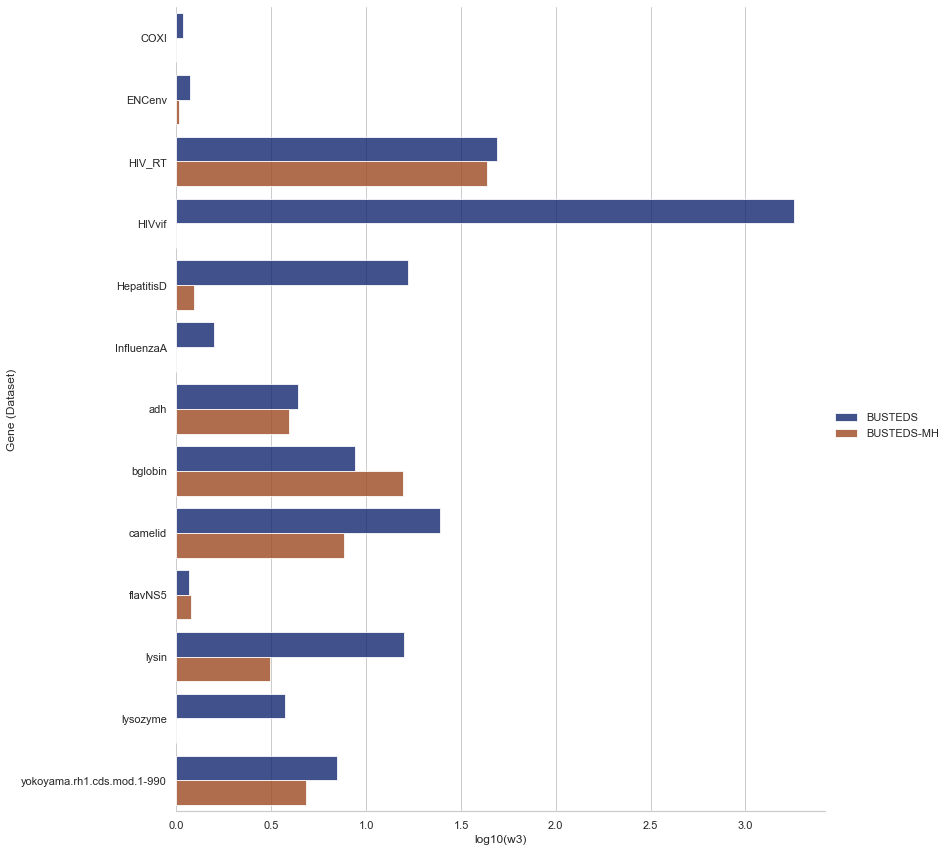

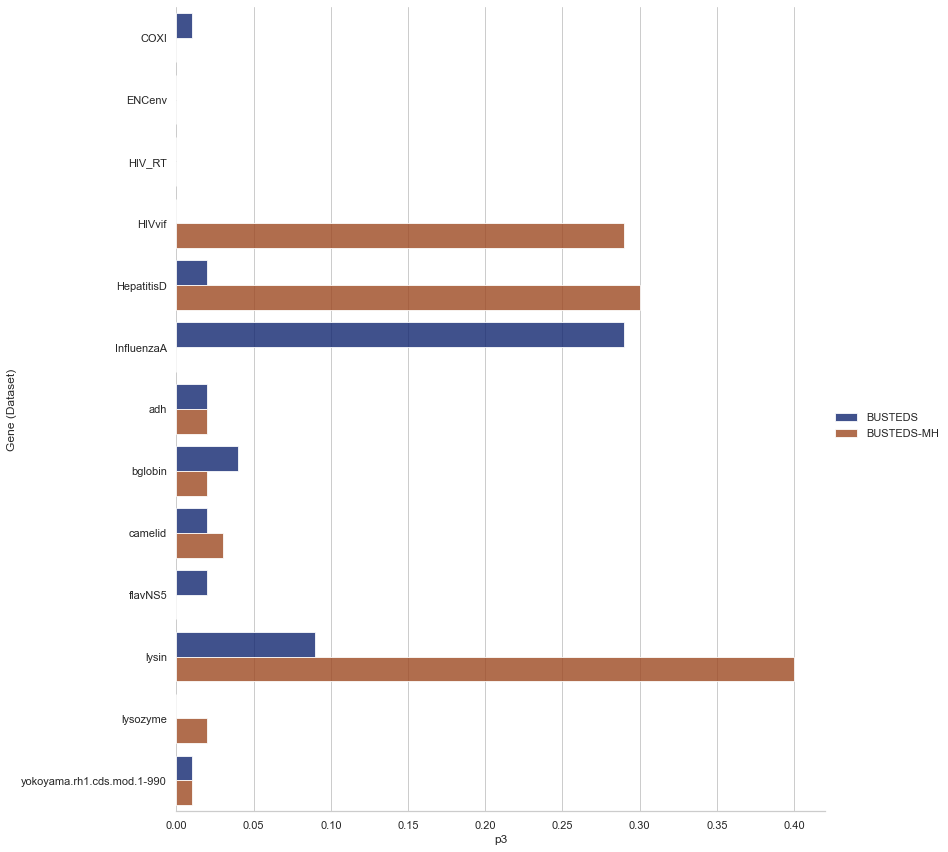

In [32]:
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
#sns.set_theme(style="white")

#penguins = sns.load_dataset("penguins")
dfv["log10(w3)"] = np.log10(dfv["w3"])

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfv, kind="bar",
    x="log10(w3)", y="Gene", hue="Method",
    ci="sd", palette="dark", alpha=.8, height=12
)
g.despine(left=True)
g.set_axis_labels("log10(w3)", "Gene (Dataset)")
g.legend.set_title("")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfv, kind="bar",
    x="p3", y="Gene", hue="Method",
    ci="sd", palette="dark", alpha=.8, height=12
)
g.despine(left=True)
g.set_axis_labels("p3", "Gene (Dataset)")
g.legend.set_title("")

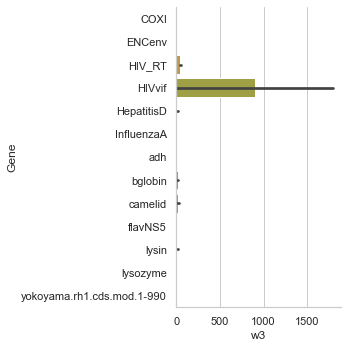

In [33]:
sns.catplot(y = "Gene",       # x variable name
            x = "w3",       # y variable name
            data = df,     # dataframe to plot
            kind = "bar")